In [1]:
from ann_visualizer.visualize import ann_viz
import keras
from keras.models import Sequential
from keras.layers import Dense
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import linear_model
from sklearn.model_selection import StratifiedKFold, train_test_split

/usr/local/lib/python3.5/dist-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
plt.style.use('ggplot')

In [3]:
df = pd.read_csv('titanic.csv')

In [4]:
df['IsCabin'] = df.Cabin.apply(
    lambda x: 1 if isinstance(x, str) else 0)
df['IsFemale'] = df.Sex.apply(
    lambda x: 1 if x == 'female' else 0)
df['LenName'] = df.Name.apply(len)

In [5]:
df = pd.concat([df, pd.get_dummies(df.Embarked)], axis = 1)

In [6]:
df.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  IsCabin  IsFemale  \
0      0         A/5 21171   7.2500   NaN        S        0         0   
1      0          PC 17599  71.2833   C85        C        1         1   
2      0  STON/O2. 3101282   7.9250   NaN        S        0         1   
3      0            113803  53.1000  C123        S        1         1   
4      0            373450   8.0500   NaN        S        0         0   

   LenName  C  Q  S  
0       23  0  0  1  
1       51  1  0  0  
2       22  0  0  1  
3       44  0  0  1  
4       24  0  0  1

In [7]:
df.shape

(891, 18)

In [8]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
IsCabin          0
IsFemale         0
LenName          0
C                0
Q                0
S                0
dtype: int64

In [9]:
df = df[np.isfinite(df['Age'])]

In [10]:
X = df[['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'LenName', 'IsCabin', 
        'IsFemale', 'LenName', 'C', 'Q', 'S']]
y = df['Survived']

In [11]:
X.shape

(714, 12)

In [12]:
y.shape

(714,)

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [14]:
model = linear_model.LogisticRegression(penalty = 'l2', 
                                        C = 1e42, 
                                        random_state = 42)

In [15]:
model.fit(X_train, y_train)

LogisticRegression(C=1e+42, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=42, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [16]:
model.coef_

array([[-9.43847983e-01, -4.71364622e-02, -4.73547734e-01,
        -2.02414809e-01,  2.16600327e-03,  1.99013608e-02,
         5.63529475e-01,  2.60565503e+00,  1.99013608e-02,
        -1.60598903e+00, -1.93991971e+00, -2.01118693e+00]])

In [17]:
model.intercept_

array([3.05242694])

In [18]:
model.score(X_train, y_train)

0.8161120840630472

In [19]:
model.score(X_test, y_test)

0.7622377622377622

In [20]:
model_cv = linear_model.LogisticRegressionCV(penalty = 'l2', 
                                             solver = 'liblinear', 
                                             Cs = [100.0, 10.0, 1.0, 0.01, 0.001],
                                             refit = False)
model_cv.fit(X_train, y_train)

LogisticRegressionCV(Cs=[100.0, 10.0, 1.0, 0.01, 0.001], class_weight=None,
           cv=None, dual=False, fit_intercept=True, intercept_scaling=1.0,
           max_iter=100, multi_class='ovr', n_jobs=1, penalty='l2',
           random_state=None, refit=False, scoring=None,
           solver='liblinear', tol=0.0001, verbose=0)

In [21]:
model_cv.C_

array([34.])

In [22]:
model_cv.coef_

array([[-0.79626296, -0.04349079, -0.46400093, -0.19371372,  0.00302633,
         0.02301644,  0.63322989,  2.44195799,  0.02301644,  0.18788056,
        -0.12006646, -0.20461058]])

In [23]:
model_cv.score(X_train, y_train)

0.8108581436077058

In [24]:
model_cv.score(X_test, y_test)

0.7622377622377622

In [25]:
X.isnull().sum()

Pclass      0
Age         0
SibSp       0
Parch       0
Fare        0
LenName     0
IsCabin     0
IsFemale    0
LenName     0
C           0
Q           0
S           0
dtype: int64

In [26]:
skf = StratifiedKFold(n_splits = 10, random_state = 42)

In [27]:
models, coefs = [], []

In [28]:
for train, test in skf.split(X, y):
    clf = linear_model.LogisticRegression(penalty = 'l2',
                             solver = 'liblinear',
                             C = 1e42, 
                             random_state = 42)
    clf.fit(X.iloc[train], y.iloc[train])
    models.append(clf)
    coefs.append(clf.coef_[0])

In [29]:
kfold = pd.DataFrame(coefs, columns = X.columns)

In [30]:
kfold

Pclass       Age     SibSp     Parch      Fare   LenName   IsCabin  \
0 -1.041300 -0.046910 -0.332596 -0.238669  0.001912  0.019778  0.373689   
1 -1.020329 -0.041920 -0.342483 -0.096860  0.001870  0.007970  0.503969   
2 -1.055257 -0.048337 -0.518011 -0.123158  0.000042  0.016397  0.607274   
3 -0.982076 -0.045059 -0.425677 -0.099639  0.000610  0.013479  0.684069   
4 -0.929787 -0.046698 -0.402042 -0.135756  0.002544  0.011873  0.426108   
5 -1.018122 -0.049800 -0.419564 -0.142337  0.001031  0.019181  0.634746   
6 -0.886877 -0.046008 -0.441599 -0.032317  0.001255  0.015588  0.647911   
7 -0.912364 -0.049263 -0.470297 -0.055779  0.000629  0.016237  0.526919   
8 -0.980161 -0.043892 -0.404433 -0.192616  0.000019  0.017211  0.596396   
9 -1.034419 -0.044563 -0.366932 -0.156964  0.000844  0.016118  0.458201   

   IsFemale   LenName         C         Q         S  
0  2.344820  0.019778 -0.579301 -1.522074 -1.061480  
1  2.537828  0.007970 -1.976808 -2.988078 -2.459975  
2  2.526428  0.016397 -1.088143 -1.994978 -1.620218  
3  2.452252  0.013479 -1.808615 -2.541260 -2.173186  
4  2.542643  0.011873 -1.846623 -2.790729 -2.405508  
5  2.394061  0.019181 -2.033179 -2.763493 -2.405368  
6  2.439527  0.015588 -2.064923 -2.689914 -2.407802  
7  2.440295  0.016237 -2.922946 -3.286227 -3.343915  
8  2.385022  0.017211 -1.988911 -2.497592 -2.391723  
9  2.446882  0.016118 -0.753432 -1.249456 -1.075641

In [31]:
kfold.mean()

Pclass     -0.986069
Age        -0.046245
SibSp      -0.412363
Parch      -0.127409
Fare        0.001076
LenName     0.015383
IsCabin     0.545928
IsFemale    2.450976
LenName     0.015383
C          -1.706288
Q          -2.432380
S          -2.134482
dtype: float64

In [32]:
ann = Sequential()
ann.add(Dense(units = 16, 
              activation = 'relu', 
              kernel_initializer = 'uniform',
              input_dim = 12))
ann.add(Dense(units = 8, 
              activation = 'relu', 
              kernel_initializer = 'uniform'))
ann.add(Dense(units = 4, 
              activation = 'relu', 
              kernel_initializer = 'uniform'))
ann.add(Dense(units = 1,
              activation = 'sigmoid',
              kernel_initializer = 'uniform'))
ann.compile(optimizer = 'adam',
            loss = 'binary_crossentropy',
            metrics = ['acc'])

In [33]:
history = ann.fit(X_train, y_train, 
                  epochs = 256, 
                  batch_size = 64, 
                  verbose = 0, 
                  validation_data = (X_test, y_test))

In [34]:
ann.evaluate(X_test, y_test, batch_size = 64)

143/143 [==============================] - 0s 47us/step


[0.5032801198792625, 0.7622377643218408]

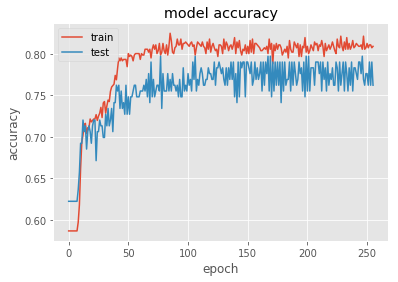

In [35]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')

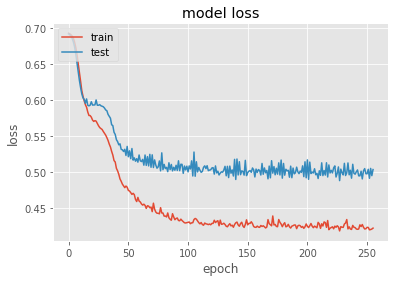

In [36]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [37]:
ann_viz(ann, title = "")